# Spatial Imaging dv/v
spatial imaging by means of a diffusion-based sensitivity kernel (see Obermann, et al., 2013 and Pacheco and Snieder, 2005)

Implementation here is just for the 2D case

## open values computed from cascadia

### L Curve

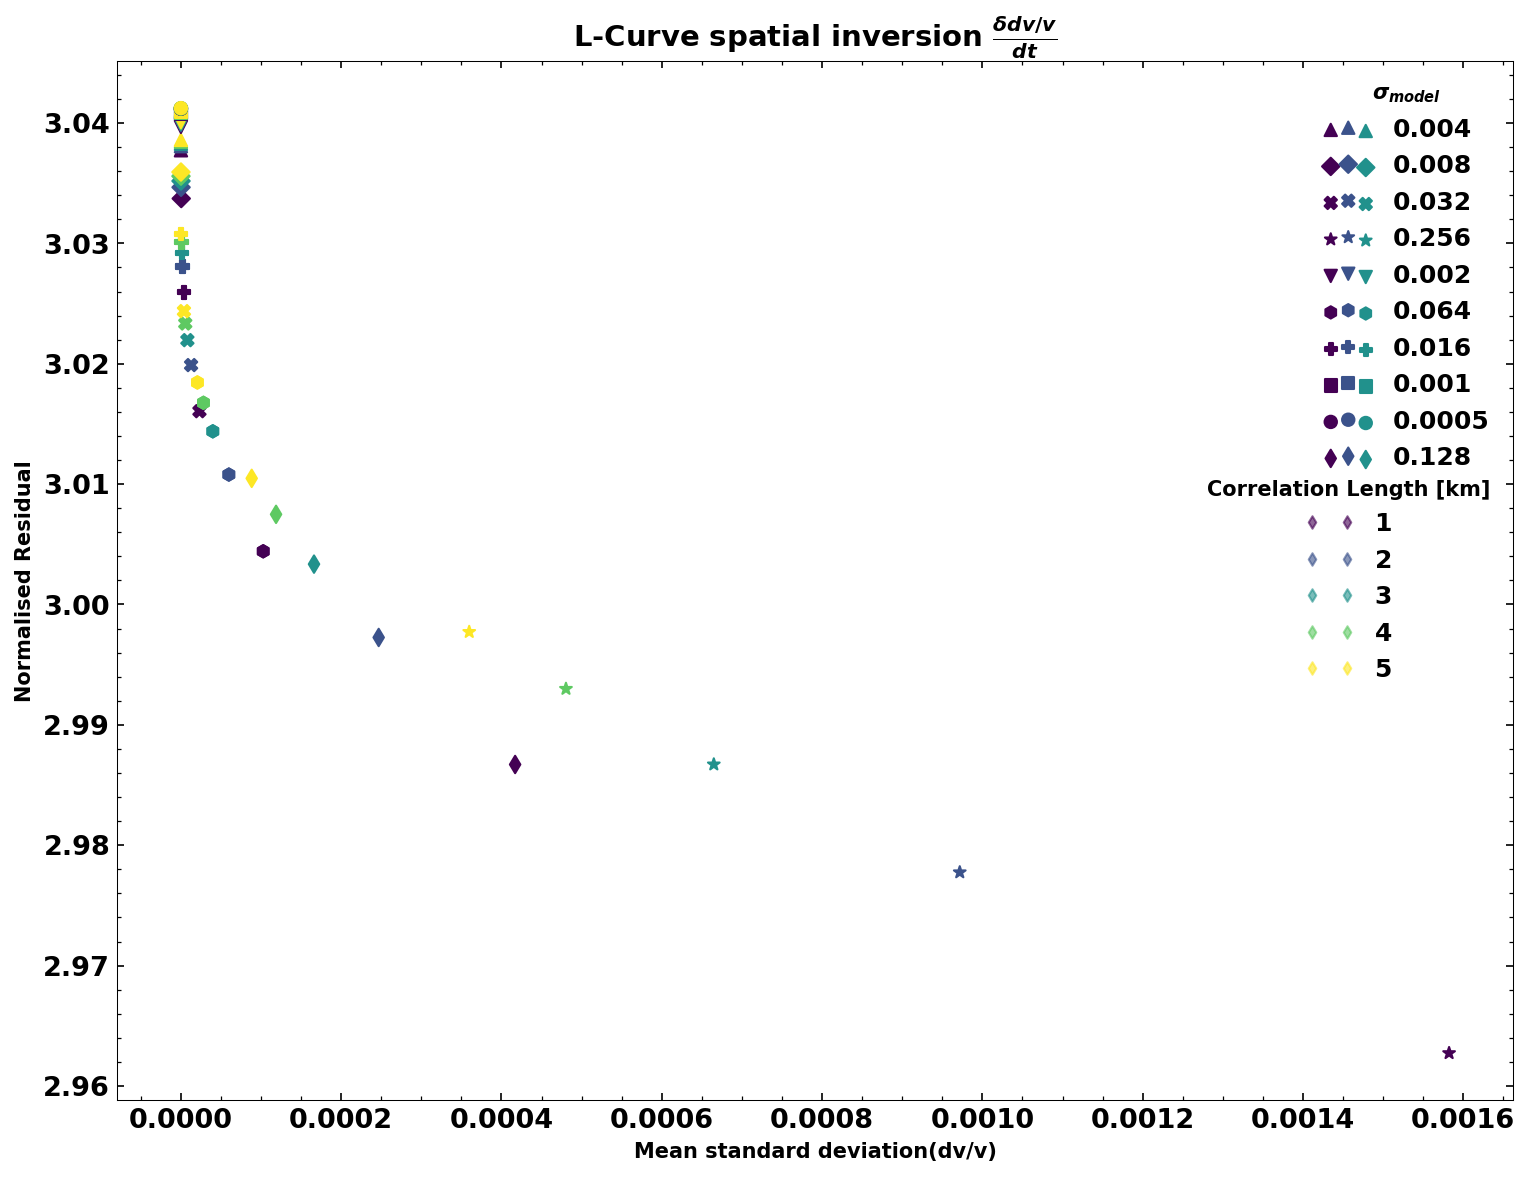

In [8]:
import glob
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

from seismic.plot.plot_utils import set_mpl_params

filename = 'Lcurve_0.25'  # input and output


lc = np.load(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_tdependent_lcurve_singlecross_allcc_filtereddv/{filename}.npz')
outfolder = '/home/pm/Documents_sync/PhD/StHelens/spatial/figures/lcurves/allcc_dvfilt'
os.makedirs(outfolder, exist_ok=True)
residual = lc['residual']
corr_len = lc['corr_len']
std_model = lc['std_model']
model_variance = lc['model_variances']
times = lc['times']
vel_changedt = lc['vel_change']

residual[residual==0] = np.nan
# thsi is the model variance for the first derivative of dv/v
model_variance[residual==0] = np.nan


xax = len(corr_len)

vel_change_total = np.sum(vel_changedt, axis=1)
vel_change_total = np.reshape(vel_change_total, (xax, -1))



vel_change = np.cumsum(vel_changedt, axis=1)
vel_change = np.reshape(vel_change, (xax, len(times), -1))

# compute the model variance for vel_change
model_variance_dv = np.var(vel_change, axis=-1)



# change shape so that, the grid shape disappears

# residual = np.reshape(lc['residual'], (5, 6)).Tj
# corr_len = np.reshape(lc['corr_len'], (5, 6)).T
# std_model = np.reshape(lc['std_model'], (5, 6)).T
# model_variance = np.reshape(lc['model_variances'], (5, 6)).T

set_mpl_params()

size = (np.arange(len(list(set(std_model))), dtype='float')+1)*50  # for stds

size_id = np.sort(list(set(std_model)))
sizedict = {k: v for k, v in zip(size_id, size)}

# 6 colours, 5 shapes
plt.figure(figsize=(12, 9))
ax = plt.gca()
sizes = np.array([sizedict[std] for std in std_model])

markerdict = {k: v for k, v in zip(size_id, ['o', 's', 'v', '^', 'D', 'P', 'X', 'h', 'd', '*'])}
markers = [markerdict[std] for std in std_model]
# actually mathematically correct is to plot the L2 norm of the model
# against the L2 norm of the residual
# scatter = plt.scatter(np.sqrt(np.mean(vel_change_total**2, axis=-1)), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)

# plot with varying markers
for marker in set(markers):
    i = np.where(np.array(markers) == marker)
    # scatter = plt.scatter(np.nanmean(np.sqrt(model_variance), axis=-1)[i], np.nanmean(residual, axis=-1)[i], c=np.array(corr_len)[i], s=35, marker=marker, label=std_model[i][0])

    # scatter = plt.scatter(np.nanmean(np.sqrt(np.mean(vel_change**2, axis=-1)), axis=-1)[i], np.nanmean(residual, axis=-1)[i], c=np.array(corr_len)[i], s=35, marker=marker, label=std_model[i][0])

    scatter = plt.scatter(np.nanmean(model_variance, axis=-1)[i], np.nanmean(residual, axis=-1)[i], c=np.array(corr_len)[i], s=35, marker=marker, label=std_model[i][0])

# scatter = plt.scatter(np.nanmean(np.sqrt(model_variance), axis=-1), np.nanmean(residual, axis=-1), c=corr_len, s=sizes, marker=markers)


# ### automatically find the point with the highest curvature
# interpolate function through the scatter
# x = np.nanmean(np.sqrt(model_variance), axis=-1)
# y = np.nanmean(residual, axis=-1)

# xq = np.linspace(np.min(x), np.max(x), 1000)
# yq = np.interp(xq, x, y)
# def fit_func(x, a, c):
#     return a/x + c

# popt, pcov = curve_fit(fit_func, x, y)
# plt.plot(xq, fit_func(xq, *popt), 'k--', alpha=.5)
# # for this identify the point with the highest curvature
# # and plot that point

# # 1. compute 2nd derivative
# yq2 = np.diff(np.diff(fit_func(xq, *popt)))
# # 2. find the maximum
# max_curvature = np.argmax(yq2[2:-2])
# # 3. plot that point
# plt.scatter(xq[max_curvature], fit_func(xq[max_curvature], *popt), marker='x', s=100, color='red', alpha=.5)


# plot this with squares
# scatter = plt.scatter(np.nanmean(np.sqrt(model_variance), axis=-1), np.nanmean(residual, axis=-1), c=corr_len, s=sizes, marker='s', alpha=.5)
# scatter = plt.scatter(np.mean(np.sqrt(model_variance_dv), axis=-1), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)

# this is the max vel-change registered at all times and all grid points
# scatter = plt.scatter(100*np.max(abs(np.reshape(vel_change, (xax, -1))), axis=-1), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)


# this is not an l-curve because it's the sum out of many inversions.
# scatter = plt.scatter(np.var(vel_change_total, axis=-1), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Correlation Length [km]")
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
plt.legend(loc='upper right', title=r"$\sigma_{model}$")


plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
plt.ylabel('Normalised Residual')
plt.xlabel('Mean standard deviation(dv/v)')
# plt.xlabel('Max vel-change change (%)')


# plot log log
# plt.xscale('log')
# plt.yscale('log')

# plt.xlim((0, None))
plt.savefig(f'{outfolder}/{filename}.pdf', bbox_inches='tight', facecolor='None')

In [9]:
# Time dependent Lcurve
import os

from obspy import UTCDateTime

outfolder = os.path.join(outfolder,'tdependent')
os.makedirs(outfolder, exist_ok=True)

vel_changedt = np.reshape(vel_changedt, (xax, len(times), -1))

for ii, time in enumerate(times):
    if np.all(np.isnan(residual[:, ii])):
        continue
    # if np.all(residual[:, ii]==0):
    #     continue
    plt.figure(figsize=(12, 9))
    ax = plt.gca()
    sizes = [sizedict[std] for std in std_model]
    # make markers dependent on the standard deviation of the model
    

    markers = [markerdict[std] for std in std_model]
    # actually mathematically correct is to plot the L2 norm of the model
    # against the L2 norm of the residual
    # scatter = plt.scatter(np.sqrt(np.mean(vel_change_total**2, axis=-1)), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)

    # plot with varying markers
    for marker in set(markers):
        i = np.where(np.array(markers) == marker)
        scatter = plt.scatter(np.sqrt(model_variance)[i, ii], residual[i, ii], c=np.array(corr_len)[i], s=35, marker=marker, label=std_model[i][0])    # scatter = plt.scatter(np.sqrt(model_variance[:, ii]), residual[:, ii], c=corr_len, s=sizes, marker='s', alpha=.5)

    # scatter = plt.scatter(np.sqrt(np.mean(vel_changedt**2, axis=-1)[:, ii]), residual[:, ii], c=corr_len, s=sizes)

    # ### automatically find the point with the highest curvature
    # interpolate function through the scatter
    # x = model_variance[:, ii]
    # y = residual[:, ii]

    # xq = np.linspace(np.min(x), np.max(x), 1000)
    # yq = np.interp(xq, x, y)
    # def fit_func(x, a, c):
    #     return a * np.sqrt(x) + c

    # popt, pcov = curve_fit(fit_func, x, y)
    # plt.plot(xq, fit_func(xq, *popt), 'k--', alpha=.5)
    # # for this identify the point with the highest curvature
    # # and plot that point

    # # 1. compute 2nd derivative
    # yq2 = np.diff(np.diff(fit_func(xq, *popt)))
    # # 2. find the maximum
    # max_curvature = np.argmax(yq2)
    # # 3. plot that point
    # plt.scatter(xq[max_curvature], fit_func(xq[max_curvature], *popt), marker='x', s=100, color='red', alpha=.5)

    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Correlation Length [km]")
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
    ax.add_artist(legend1)

    # produce a legend with a cross-section of sizes from the scatter
    plt.legend(loc='upper right', title=r"$\sigma_{model}$")

    # handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    # legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
    plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
    plt.ylabel('Normalised Residual')
    plt.xlabel('Standard deviation dv/v')
    # plot log log
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.xlim((0, None))
    plt.savefig(
        f'{outfolder}/{filename}_{UTCDateTime(time)}.png',
        bbox_inches='tight', facecolor='None', dpi=200)
    plt.close()

In [ ]:
import os

maxv = np.zeros_like(std_model)

# try the same with maximal values
dirs = glob.glob('/home/pm/Documents_sync/PhD/StHelens/spatial/ddv_dt/*_masked')
for dir in dirs:
    cl, std = os.path.basename(dir).split('_')[-3:-1]
    cl, std = float(cl[2:]), float(std[3:])
    ii = np.all([corr_len==cl, std_model==std], axis=0)
    # Compute absolute maxima
    files = glob.glob(os.path.join(dir, '*.npz'))
    maxv[ii] = np.mean([abs(np.load(f)['dv']).max() for f in files])


In [ ]:
lc = np.load(glob.glob('/home/pm/Documents_sync/PhD/StHelens/spatial/ddv_dt/*/Lcurve.npz')[1])
residual = lc['residual']
corr_len = lc['corr_len']
std_model = lc['std_model']
model_variance = lc['model_variances']

# residual = np.reshape(lc['residual'], (5, 6)).Tj
# corr_len = np.reshape(lc['corr_len'], (5, 6)).T
# std_model = np.reshape(lc['std_model'], (5, 6)).T
# model_variance = np.reshape(lc['model_variances'], (5, 6)).T

set_mpl_params()

size = (np.arange(len(list(set(std_model))), dtype='float')+1)*50  # for stds

size_id = np.sort(list(set(std_model)))
sizedict = {k: v for k, v in zip(size_id, size)}

# 6 colours, 5 shapes
plt.figure(figsize=(12, 9))
ax = plt.gca()
sizes = [sizedict[std] for std in std_model]
scatter = plt.scatter(model_variance, residual, c=corr_len, s=sizes)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Correlation Length [km]")
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
plt.ylabel('Residual')
plt.xlabel('Model Variance')

plt.savefig('Lcurve.pdf', bbox_inches='tight', transparent=True)

IndexError: list index out of range

### Gridded Time-Series

974


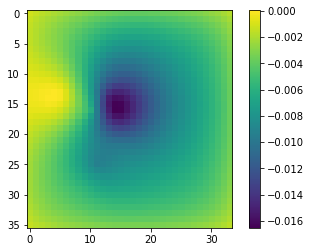

In [9]:
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = .25
corr_len = 3
std_model = 0.008

infile = glob.glob(
    f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-{freq0*2}/dvdt_3D.npz')[0]

outfolder = os.path.join(os.path.dirname(os.path.dirname(infile)), 'figures')
os.makedirs(outfolder, exist_ok=True)

loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
print(len(t))
dvdt = loaded['dv']
statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
start = np.argmin(abs(t - UTCDateTime('2007-06-01').timestamp))
end = -1
# note that this are rows -> latitude, columns -> longitude, pages -> time
dvdt = dvdt[:,:,start:]
t = t[start:]
res = loaded['resolution']
# t = t[start:end]

# Integrate to plot dv/v
# trapz doesn't work with nans
# options
# 1. manual integration
# 2. replace nans with interpolation? Otherwise this is probably not correct
# 
nani = ~np.isnan(dvdt[0,0,:])
# We start here to have February to February

# Total dv change over the whole time
dv_total = np.nansum(dvdt, axis=-1)
dv = np.nancumsum(dvdt, axis=-1)

# minmax
# dv_total = -abs(dv.max(axis=-1)-dv.min(axis=-1))

# # # seasonal
# # # average of change from January to July is <7 and the other is >6
# # Probably necessary to do a linear detrend to make sense of this
# # for detrend just remove the mean of the derivative
# dvdt_demean = dvdt - np.reshape(np.nanmean(dvdt, axis=-1), (36, 34, 1))
utcs = [UTCDateTime(tt) for tt in t]
datetimes = [utci.datetime for utci in utcs]

# indices = []
# for year in {UTCDateTime(tt).year for tt in t}:
#     indices.append(np.array([(utc.month<=6 and utc.year==year) for utc in utcs]))

# dv_total = np.nanmean([np.nansum(dvdt_demean[:, : ,ii], axis=-1) for ii in indices], axis=0)

# # before and after eruption
# print(utcs[255])
# print(utcs[401])
# dv_total = np.nansum(dvdt[:,:,255:401], axis=-1)

# # Up to eruption
# print(utcs[0])
# print(utcs[219])
# dv_total = np.nansum(dvdt[:,:,0:219], axis=-1)

# # and finally, from eruption end to now

# dv_total = np.nansum(dvdt[:,:,392:], axis=-1)

# # haida eq 28.10.2012
# # print(utcs[540:544])
# dv_total = np.nansum(dvdt[:,:,540:544], axis=-1)



# Name suffix for output figure
output_param = 'total'

plt.imshow(dv_total)
plt.colorbar()

### Show dv/v time series at one point

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


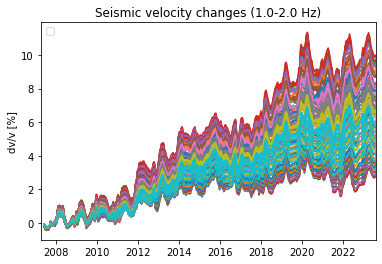

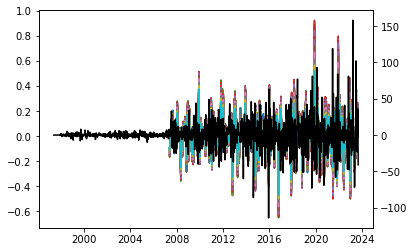

In [20]:
import datetime
# load numpy archives with data availability
loaded= np.load(f'/home/pm/Documents_sync/PhD/StHelens/dv/new_gap_handling/availability_{freq0}.npz', allow_pickle=True)
avail_t = loaded['t']
avail_n = loaded['n']

avail_nd = np.hstack((0, np.diff(avail_n)))
# remove the peak at the end
avail_nd[np.argmin(avail_nd)] = 0

# plt.plot(datetimes, -100*dv[17, 20, :], label='MSH summit')
# plt.plot(datetimes, -100*dv[20, 12, :], label='loc of maximum dv/v increase')
for ii in range(10):
    ii += 10
    for jj in range(10):
        jj += 10
        plt.plot(datetimes, -100*dv[ii, jj, :])
ax1 = plt.gca()
# plot data availability as bars on second y axis


# ax2.set_ylim([0, 500])
# ax1.set_ylim([-3, 4])

plt.xlim([datetime.datetime(2007, 4, 1), datetime.datetime(2023, 8, 1)])
ax1.set_ylabel('dv/v [%]')
plt.title(f'Seismic velocity changes ({freq0}-{freq0*2} Hz)')
plt.legend()

plt.savefig(os.path.join(outfolder, f'dvv1d_{freq0}.pdf'), bbox_inches='tight', transparent=True)

plt.figure()
for ii in range(10):
    ii += 10
    for jj in range(10):
        jj += 10
        plt.plot(datetimes, -100*dvdt[ii, jj, :])
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(avail_t, avail_nd, color='k')

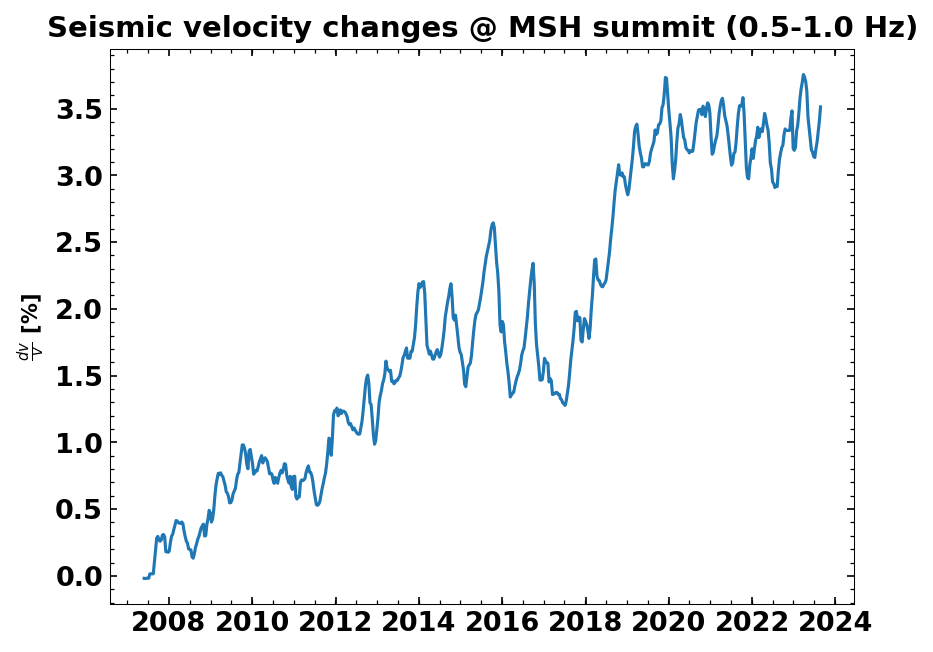

In [47]:

plt.plot(datetimes, -100*dv[15, 19, :], label='MSH summit')
plt.ylabel(r'$\frac{dv}{v}$ [%]')
plt.title(f'Seismic velocity changes @ MSH summit ({freq0}-{freq0*2} Hz)')
plt.savefig(os.path.join(outfolder, f'dvv1d_{freq0}_summit.png'), dpi=300, bbox_inches='tight', transparent=True)
# gridlines
# plt.gca().grid(which='both', axis='both', linestyle='--')

# highpass filter 1d time series
# from obspy.signal.filter import highpass
# from scipy.signal import detrend
# dv_1d = -100*dv[15, 19, :]
# dv_1d = detrend(dv_1d)
# df = 1/(datetimes[1]-datetimes[0]).total_seconds()
# filtfreq = 1/(2*365.25*24*60*60)
# dv_1d = highpass(dv_1d, filtfreq, df, corners=4, zerophase=True)
# plt.plot(datetimes, dv_1d, label='highpass filtered')

# # difference
# plt.plot(datetimes, -100*dv[15, 19, :]- dv_1d, label='highpass filtered')


#### Plot this using PyGMT

In [2]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt


lat = km2d(y)
lat0 = lat.min()
lon0 = -122.45 # -122.34
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="03s", region=region)
# topo is returned as lines are latitude and columns longitude


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.021666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.365


In [49]:
from scipy.interpolate import RegularGridInterpolator

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data


lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])

f = RegularGridInterpolator((lat, lon), dv_total, bounds_error=False, method='linear')

dv_totalint = f(qcoords)
dv_totalint = dv_totalint.reshape(latqg.shape)

dv_total_grid = DataArray(data=dv_totalint*-100, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')
print(-dv_total.min()*100, -dv_total.max()*100)

4.664558583697093 0.4758995817348979


In [7]:
# pygmt.config() #'13p')
import os
import pandas as pd

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)


fig = pygmt.Figure()
# create colorbar for xarray.DataArray
absmax = np.max(abs(dv_total))
pygmt.makecpt(
    cmap="red,white,blue",
    series=f"{-absmax*100-.01}/{absmax*100+.01}",
    continuous=True,
    reverse=False,
)

persp = [160, 30] #40
proj = "M30c"

cb_tick_increment = round(
    (dv_total.max() - dv_total.min())*100/7,
    int(-np.floor(np.log10(100*(dv_total.max() - dv_total.min()))) + 1))

surftype = 'sm'
with pygmt.config(
    MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
    # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
    # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
    # MAP_TICK_LENGTH_PRIMARY=0.5,
    # MAP_TICK_LENGTH_SECONDARY=0.5,
    # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
    # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
    FONT='25p,Helvetica-Bold'):
    fig.grdview(
        grid=topo,
        drapegrid=dv_total_grid,
        # Sets the view azimuth as 130 degrees, and the view elevation as 30
        # degrees
        perspective=persp, #160 50
        region=region,
        # Sets the x- and y-axis labels, and annotates the west, south, and east
        # axes
        frame=["xa", "ya", "WSnE"],
        # surftype='sm',#m0.01p',
        surftype=surftype,
        # cmap='rainbow',
        # plane="2000+gblack",
        # Sets a Mercator projection on a 15-centimeter figure
        projection=proj,
        # Sets the height of the three-dimensional relief centimeters
        zsize="4c",
        # meshpen="0,150",
        meshpen="0.1p",
        # contourpen="0.1p,black",
        transparency=20,
        interpolation='n'
    )
    fig.colorbar(frame=[f'a{cb_tick_increment}', "x+ldv/v", "y+l[%]"],perspective=persp, projection=proj)
    fig.plot(
        x=stats.Longitude, y=stats.Latitude, style="i0.7c", color="red", pen="black", transparency=25, perspective=persp, projection=proj)
fig.savefig(f'{outfolder}/dvv_map_{output_param}_{freq0}-{freq0*2}_{surftype}_contour075.png', dpi=300, transparent=True)

## dv/v time series video

In [2]:
# get events
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.core.event.catalog import Catalog
import numpy as np
from obspy import read_events


minmag = 0
try:
    evts = read_events(f'MSH_events_minmag{minmag}.xml')
except FileNotFoundError:
    c = Client('USGS', timeout=240)

    lat = [45.95, 46.45]
    lon = [-122.45, -121.96]


    starttime = UTCDateTime(year=2007, julday=1)
    endtime = UTCDateTime(year=2023, julday=300)
    delta = 86400*365
    rtimes = np.linspace(starttime.timestamp, endtime.timestamp, 12)
    # rtimes = np.arange(starttime.timestamp, endtime.timestamp, delta)
    evts = Catalog()



    for ii, rtime in enumerate(rtimes):
        if ii == len(rtimes)-1:
            break
        start = UTCDateTime(rtime)
        end = UTCDateTime(rtimes[ii+1])
        print(f'downloading events from {start} to {end}')
        evts.extend(c.get_events(
            starttime=start, endtime=end, minmagnitude=minmag, maxdepth=15,
            minlatitude=lat[0], maxlatitude=lat[1], minlongitude=lon[0],
            maxlongitude=lon[1]))
    evts.write(f'MSH_events_minmag{minmag}.xml', format='QUAKEML')

otimes = [evt.preferred_origin().time.datetime for evt in evts]
hypz = [-evt.preferred_origin().depth for evt in evts]
hyplats = [evt.preferred_origin().latitude for evt in evts]
hyplons = [evt.preferred_origin().longitude for evt in evts]

In [10]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt


lat = km2d(y)
lat0 = lat.min()
lon0 = -122.45 # -122.34
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [
    lon.min(), lon.max(),
    lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="15s", region=region)
# topo is returned as lines are latitude and columns longitude


grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.016666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.3708333333


In [7]:
# pygmt.config() #'13p')
import os
import datetime
import pandas as pd
from scipy.interpolate import RegularGridInterpolator

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data
lonq = np.linspace(lonq.min(), lonq.max(), 102)
latq = np.linspace(latq.min(), latq.max(), 75)
lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])


# create colorbar for xarray.DataArray
absmax = np.max(abs(dv))
pygmt.makecpt(
    cmap="red,white,blue",
    series=f"{-absmax*100-.01}/{absmax*100+.01}",
    continuous=True,
    reverse=False,
)

persp = [160, 60] #40
proj = "M30c"

cb_tick_increment = round(
    (dv.max() - dv.min())*100/7,
    int(-np.floor(np.log10(100*(dv.max() - dv.min()))) + 1))
# cb_tick_increment = 0.1

surftype = 'sm'
for date in datetimes:
    fig = pygmt.Figure()
    ii = np.argmin(abs(date - np.array(datetimes)))
    f = RegularGridInterpolator(
        (lat, lon), dv[:, :, ii], bounds_error=False, method='linear', fill_value=0)

    

    dv_totalint = f(qcoords)
    dv_totalint = dv_totalint.reshape(latqg.shape)

    dv_grid = DataArray(data=np.squeeze(dv_totalint)*-100, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')
    # dv_grid = DataArray(data=np.squeeze(dv[:, :, ii])*-100, coords={'lon': lon, 'lat': lat}, dims=('lat', 'lon'), name='dv/v')
    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        fig.grdview(
            grid=topo,
            drapegrid=dv_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            perspective=persp, #160 50
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            frame=[f"+t{date}", "xa", "ya"],
            
            # surftype='sm',#m0.01p',
            surftype=surftype,
            # cmap='rainbow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief centimeters
            zsize="4c",
            # meshpen="0,150",
            meshpen="0.1p",
            # contourpen="0.1p,black",
            transparency=20,
            interpolation='n'
        )
        fig.colorbar(
            frame=[f'a{cb_tick_increment}', "x+ldv/v", "y+l[%]"],
            perspective=persp, projection=proj)
        fig.plot(
            x=stats.Longitude, y=stats.Latitude, style="i0.7c", color="red",
            pen="black", transparency=25, perspective=persp, projection=proj)
        # plot all events that ocurred in the previous 10 days
        for ot, hz, hyplon, hyplat in zip(otimes, hypz, hyplons, hyplats):
            if ot-date > datetime.timedelta(days=-10) and ot-date < datetime.timedelta(days=0):
                fig.plot(
                    x=hyplon, y=hyplat, style="c0.3c", color="purple",
                    pen="black", transparency=25, perspective=persp,
                    projection=proj)
    os.makedirs(f'{outfolder}/video_{freq0}', exist_ok=True)
    fig.savefig(f'{outfolder}/video_{freq0}/{date}.jpg', dpi=70)

In [8]:
# rename jpg files so they are named 001.jpg, 002.jpg, etc.
import glob
import os
import shutil
import imageio.v3 as iio
import glob

files = glob.glob(f'{outfolder}/video_{freq0}/*.jpg')
files.sort()
for ii, file in enumerate(files):
    shutil.move(file, f'{outfolder}/video_{freq0}/{ii:03d}.jpg')
# create gif from the images above


frames = np.stack([iio.imread(f"{outfolder}/video_{freq0}/{str(x).zfill(3)}.jpg") for x in range(1, 594)], axis=0)

iio.imwrite(f'{outfolder}/video_{freq0}/dvv.gif', frames, duration=0.1)

## Resolution video

In [11]:
# pygmt.config() #'13p')
import os
import datetime
import pandas as pd
from scipy.interpolate import RegularGridInterpolator

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data
lonq = np.linspace(lonq.min(), lonq.max(), 102)
latq = np.linspace(latq.min(), latq.max(), 75)
lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])


# create colorbar for xarray.DataArray
pygmt.makecpt(
    cmap="batlow",
    series=f"0/2",
    continuous=True,
    reverse=False,
)

persp = [160, 60] #40
proj = "M30c"

cb_tick_increment = 0.25
# cb_tick_increment = 0.1

surftype = 'sm'
for date in datetimes:
    fig = pygmt.Figure()
    ii = np.argmin(abs(date - np.array(datetimes)))
    f = RegularGridInterpolator(
        (lat, lon), res[:, :, ii], bounds_error=False, method='linear', fill_value=0)

    

    res_totalint = f(qcoords)
    res_totalint = res_totalint.reshape(latqg.shape)

    res_grid = DataArray(data=np.squeeze(res_totalint), coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')
    # dv_grid = DataArray(data=np.squeeze(dv[:, :, ii])*-100, coords={'lon': lon, 'lat': lat}, dims=('lat', 'lon'), name='dv/v')
    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        fig.grdview(
            grid=topo,
            drapegrid=res_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            perspective=persp, #160 50
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            frame=[f"+t{date}", "xa", "ya"],
            
            # surftype='sm',#m0.01p',
            surftype=surftype,
            # cmap='rainbow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief centimeters
            zsize="4c",
            # meshpen="0,150",
            meshpen="0.1p",
            # contourpen="0.1p,black",
            transparency=20,
            interpolation='n'
        )
        fig.colorbar(
            frame=[f'a{cb_tick_increment}', "x+lresolution"],
            perspective=persp, projection=proj)
        fig.plot(
            x=stats.Longitude, y=stats.Latitude, style="i0.7c", color="red",
            pen="black", transparency=25, perspective=persp, projection=proj)
    os.makedirs(f'{outfolder}/video_res_{freq0}', exist_ok=True)
    fig.savefig(f'{outfolder}/video_res_{freq0}/{date}.jpg', dpi=70)

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


In [12]:
# rename jpg files so they are named 001.jpg, 002.jpg, etc.
import glob
import os
import shutil
import imageio.v3 as iio
import glob

files = glob.glob(f'{outfolder}/video_res_{freq0}/*.jpg')
files.sort()
for ii, file in enumerate(files):
    shutil.move(file, f'{outfolder}/video_res_{freq0}/{ii:03d}.jpg')
# create gif from the images above


frames = np.stack([iio.imread(f"{outfolder}/video_res_{freq0}/{str(x).zfill(3)}.jpg") for x in range(1, 594)], axis=0)

iio.imwrite(f'{outfolder}/video_res_{freq0}/dvv.gif', frames, duration=0.1)

## Parameter Comparison

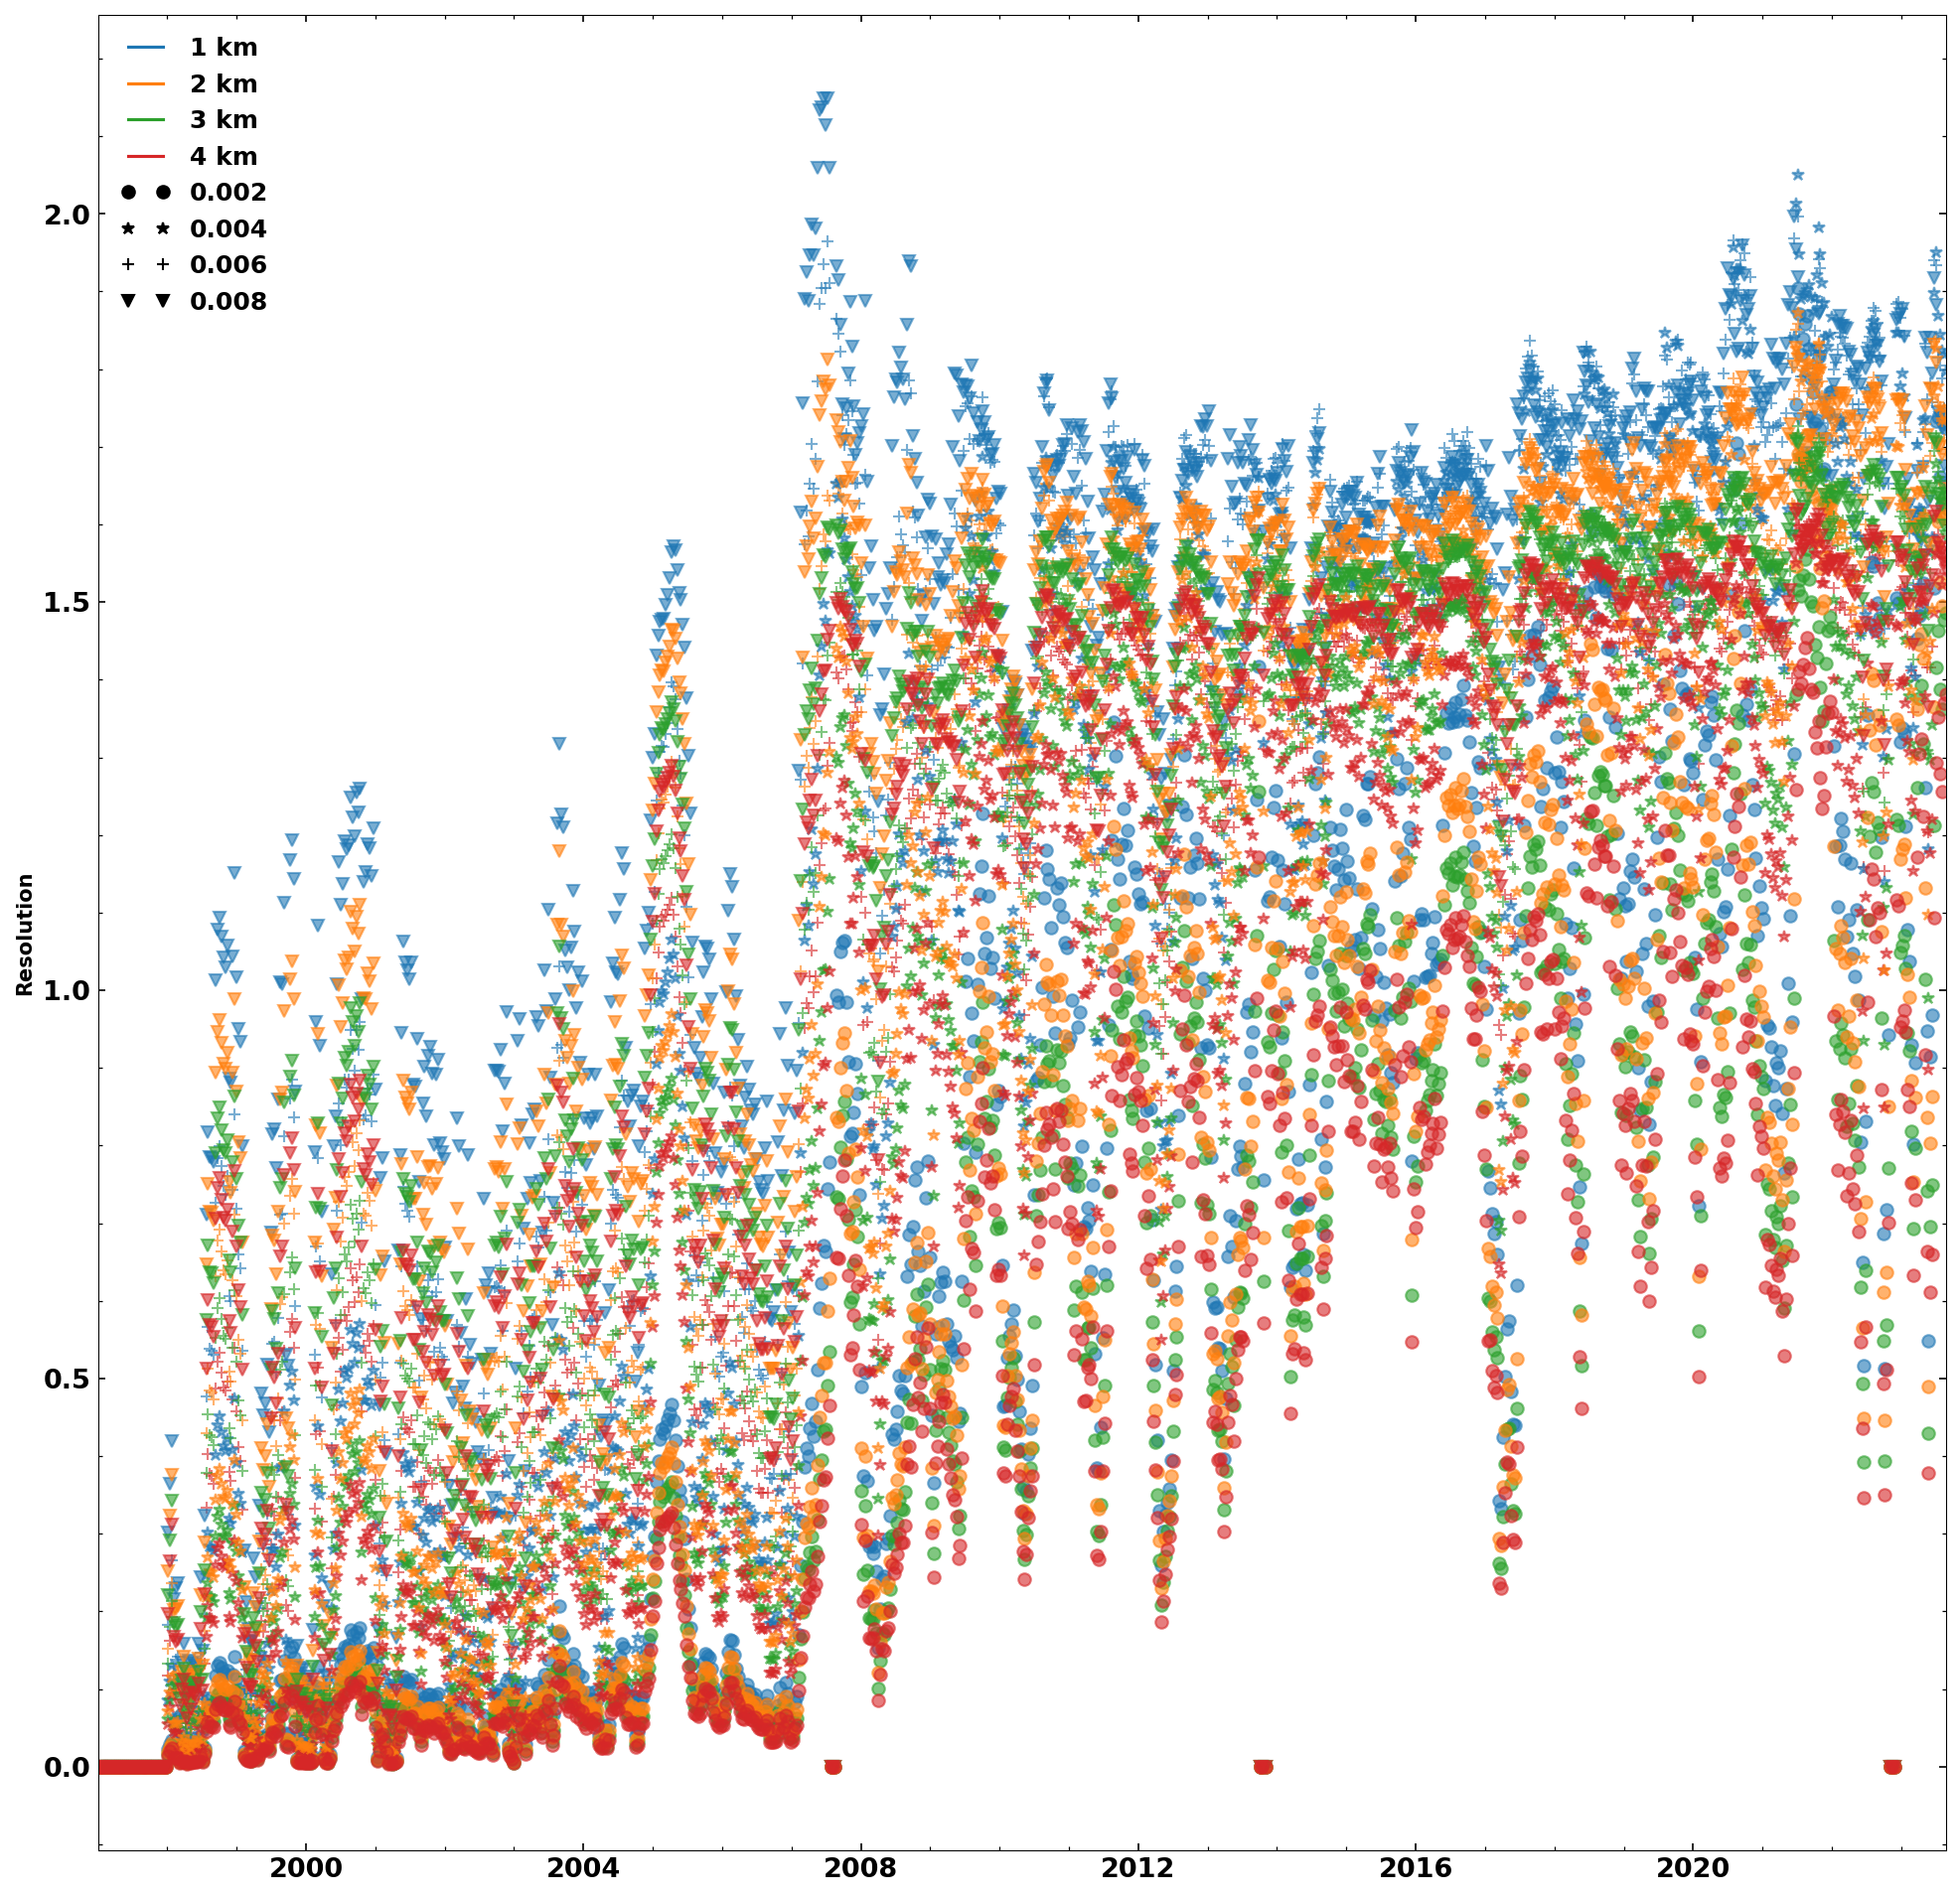

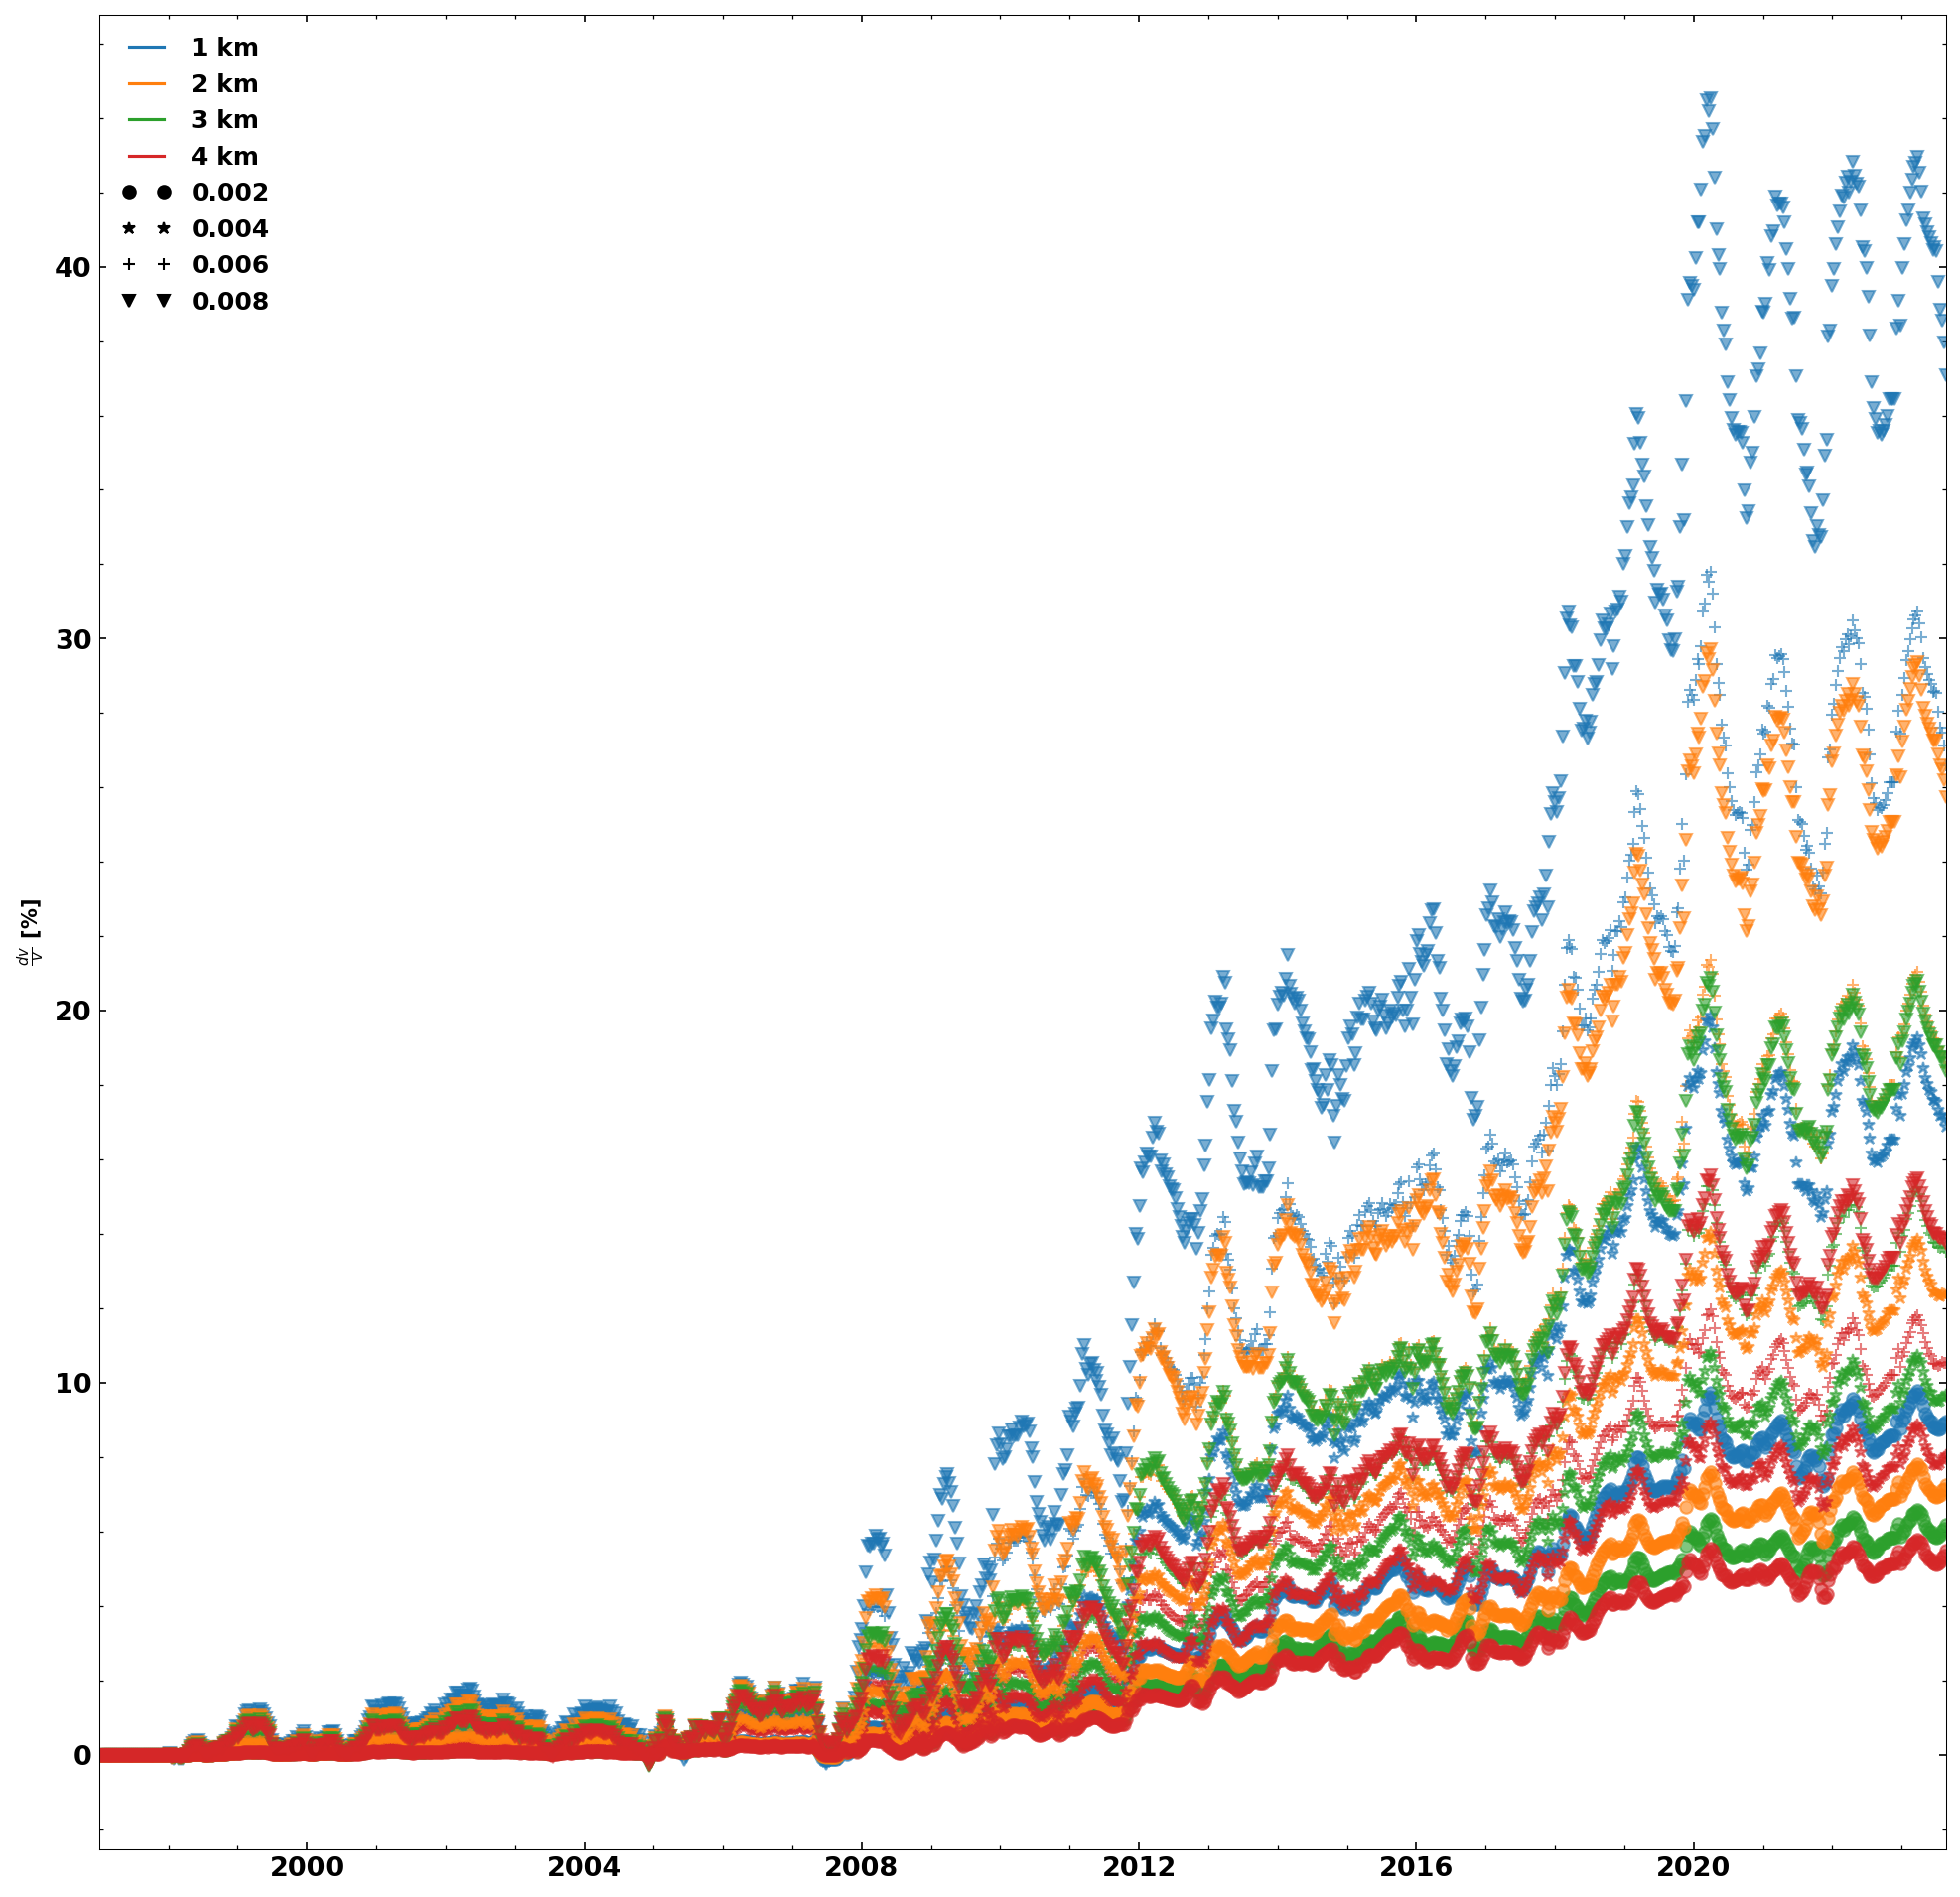

In [9]:
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from obspy import UTCDateTime

from seismic.plot.plot_utils import set_mpl_params

set_mpl_params()

freq0 = 1.0
infiles = glob.glob(
    f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_dvfilt_allcc_cl?_std*_largemap/{freq0}-{freq0*2}/dvdt_3D.npz')
outfolder = '/home/pm/Documents_sync/PhD/StHelens/spatial/param_comparison/allcc_dvfilt'
os.makedirs(outfolder, exist_ok=True)

ax0, ax1 = None, None
fig0, fig1 = None, None

# make colors dependent on the correlation length
# make markers dependent on the standard deviation of the model
# 4 colours, 4 shapes
colordict = {1: 'C0', 2: 'C1', 3: 'C2', 4: 'C3'}
linestyle = {2e-3: 'o{c}', 4e-3: '*{c}', 6e-3: '+{c}', 8e-3: 'v{c}'}

# other option, plot as scatter plot
marker = {2e-3: 'o-', 4e-3: '*', 6e-3: '+', 8e-3: 'v'}



for infile in infiles:
    infile2 = os.path.join(os.path.dirname(infile), 'resolution.npz')
    corr_len = int(infile.split('_cl')[1][0])
    std_model = float(infile.split('_std')[1].split('_')[0])
    # load the actual data
    loaded = np.load(infile)
    loaded2 = np.load(infile2)
    x = loaded['xaxis']
    y = loaded['yaxis']
    t = loaded['taxis']
    date = [UTCDateTime(_t).datetime for _t in t]
    dvdt = loaded['dv']
    dv = np.nancumsum(dvdt, axis=-1)
    statx = loaded['statx']
    staty = loaded['staty']
    res = np.nan_to_num(loaded2['resolution'])
    fig0 = fig0 or plt.figure(figsize=(16, 16))
    ax0 = ax0 or plt.gca()
    # ax0.plot(
    #     date, res[18, 11], color=colordict[corr_len],
    #     linestyle=linestyle[std_model])
    ax0.plot(
        date, res[18, 11], linestyle[std_model].format(c=colordict[corr_len]),
        alpha=0.6)
    # ax0.scatter(
    #     date, res[18,11], color=colordict[corr_len],
    #     marker=marker[std_model], s=3, alpha=.6
    # )
    fig1 = fig1 or plt.figure(figsize=(16, 16))
    ax1 = ax1 or plt.gca()
    ax1.plot(
        date, -100*dv[18, 11], linestyle[std_model].format(c=colordict[corr_len]),
        alpha=0.6)
    # ax1.plot(
    #     date, -100*dv[18, 11], color=colordict[corr_len],
    #     linestyle=linestyle[std_model])
    # ax1.scatter(
    #     date, -100*dv[18, 11], color=colordict[corr_len],
    #     marker=marker[std_model], s=3, alpha=.6,
    # )
ax0.set_ylabel('Resolution')
ax1.set_ylabel(r'$\frac{dv}{v}$ [%]')
# make legends
for corr_len, color in colordict.items():
    ax0.plot([], [], color=color, label=f'{corr_len} km')
    ax1.plot([], [], color=color, label=f'{corr_len} km')
    # ax0.scatter([], [], color=color, label=f'{corr_len} km')
    # ax1.scatter([], [], color=color, label=f'{corr_len} km')
for std_model, linestyle in linestyle.items():
    ax0.plot(
        [], [], linestyle.format(c='k'), label=f'{std_model}')
    # ax0.scatter([], [], color='k', marker=marker[std_model], label=f'{std_model}')
    ax1.plot(
        [], [], linestyle.format(c='k'), label=f'{std_model}')
    # ax1.scatter([], [], color='k', marker=marker[std_model], label=f'{std_model}')
ax0.legend()
ax1.legend()
# ax0.set_ylim((0, 1.05*max(res[18,11])))
ax0.set_xlim((min(date), max(date)))

# ax1.set_ylim((105*min(-dv[18,11]), 105*max(-dv[18,11])))
ax1.set_xlim((min(date), max(date)))


fig0.savefig(os.path.join(outfolder, f'{freq0}_resolution.png'), dpi=300)
fig1.savefig(os.path.join(outfolder, f'{freq0}_dv.png'), dpi=300)



### Resolution

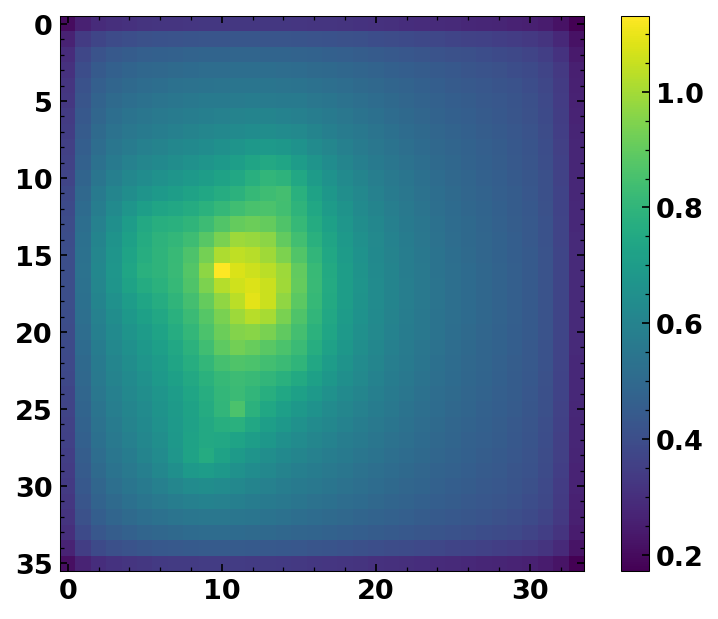

In [10]:
import glob

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = 0.25

infile = glob.glob(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_cl1_std0.008_largemap/{freq0}-{2*freq0}/resolution.npz')[0]
infile2 = glob.glob(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_cl3_std0.008_largemap/{freq0}-{2*freq0}/resolution.npz')[0]


loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
res = np.nan_to_num(loaded['resolution'])

loaded2 = np.load(infile2)
res2 = np.nan_to_num(loaded2['resolution'])

statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
end = -1
# t = t[start:end]

utcs = [UTCDateTime(tt) for tt in t]



# Name suffix for output figure
output_param = '2003-2008'

plt.imshow(np.mean(res, axis=-1))
plt.colorbar()

ValueError: x and y must have same first dimension, but have shapes (594,) and (974,)

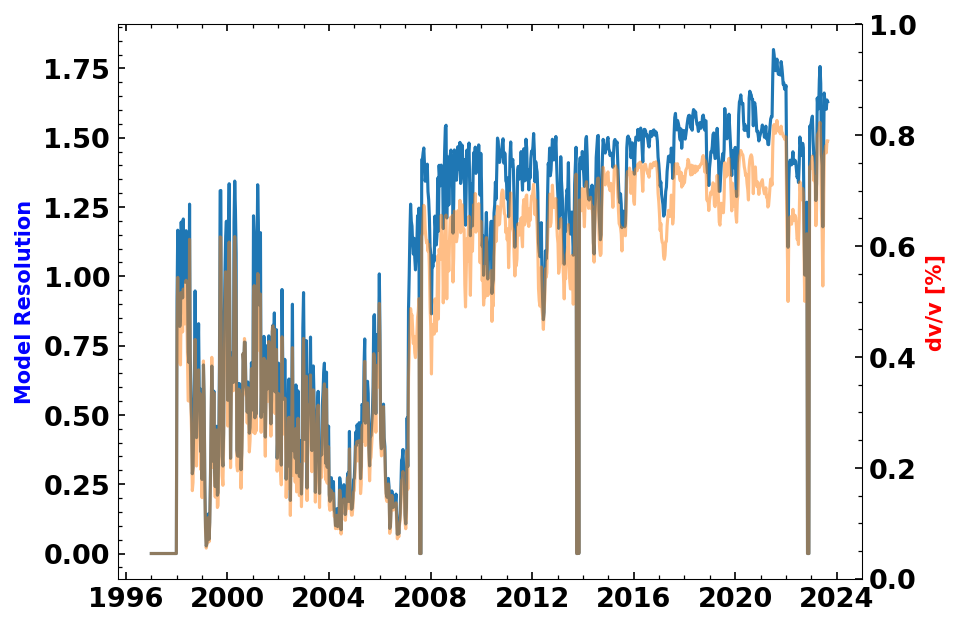

In [11]:
from seismic.plot.plot_utils import set_mpl_params
set_mpl_params()

date = [UTCDateTime(tt).datetime for tt in t]


# plt.plot(date, np.max(np.reshape(res, (-1, len(date))), axis=0))
plt.plot(date, res[18, 11], label='Resolution')
plt.plot(date, res2[18, 11], label='Resolution', alpha=.5)

plt.ylabel('Model Resolution')
plt.gca().yaxis.label.set_color('blue')


plt.twinx()
plt.ylabel('dv/v [%]')
# color this y-label red
plt.gca().yaxis.label.set_color('red')
plt.plot(datetimes, -100*dv[18, 11, :], color='red', label=r'$\frac{dv}{v}$')# print(res.shape, t.shape)
plt.savefig(os.path.join(outfolder, f'resolution_{output_param}_{freq0}.pdf'), bbox_inches='tight', transparent=True)
# plt.legend()


In [ ]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt


lat = km2d(y)
lat0 = lat.min()
lon0 = -122.45
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="03s", region=region)


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.021666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.365


In [ ]:
from scipy.interpolate import RegularGridInterpolator

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data


lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])

# f = RegularGridInterpolator((lat, lon), res, bounds_error=False, method='linear')

# dv_totalint = f(qcoords)
# dv_totalint = dv_totalint.reshape(latqg.shape)

# dv_total_grid = DataArray(data=res, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')


In [ ]:
# pygmt.config() #'13p')
import os
import pandas as pd

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)

for ii, utc in enumerate(date):
    # compute once every 60 days
    if ii%6 != 0:
        continue
    # find active stations
    slon = [
        lo for lo, stt, et in zip(
        stats.Longitude, stats.StartTime, stats.EndTime) if UTCDateTime(stt) < utc < UTCDateTime(et)]
    slat = [
        lo for lo, stt, et in zip(
        stats.Latitude, stats.StartTime, stats.EndTime) if UTCDateTime(stt) < utc < UTCDateTime(et)]
    f = RegularGridInterpolator((lat, lon), res[:, :, ii], bounds_error=False, method='linear')
    res_now = f(qcoords)
    res_now = res_now.reshape(latqg.shape)
    # res_int_grid = DataArray(data=res_int[:, :, ii], coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')# , indexes=[lon, lat])
    res_int_grid = DataArray(data=res_now, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='res')# , indexes=[lon, lat])

    fig = pygmt.Figure()
    # create colorbar for xarray.DataArray
    pygmt.makecpt(
        cmap="viridis",
        series=f"0/2",
        continuous=True,
        reverse=False,
    )

    persp = [160, 50]
    proj = "M30c"

    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        fig.grdview(
            grid=topo,
            drapegrid=res_int_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            perspective=persp, #160 50
            # cmap='turbo',
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            frame=["xa", "ya", "WSnE"],
            surftype='sm',#m0.01p',
            # cmap='rainbow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief at 1.5 centimeters
            zsize="2c",
            meshpen="0.1p",
            transparency=20
        )
        fig.colorbar(frame=['a0.25', "x+ldv/v", "y+l[%]"],perspective=persp, projection=proj)
        fig.plot(
            x=slon, y=slat, style="i0.7c", color="red", pen="black", transparency=25, perspective=persp, projection=proj)
    os.makedirs(f'{outfolder}/resolution_maps', exist_ok=True)
    fig.savefig(f'{outfolder}/resolution_maps/{freq0}-{freq0*2}_{utc.date()}.png', dpi=100, transparent=True)

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (i

# Local quakes
check for correlations in the dv/v trend and the number of earthquake occurences (and their depths)

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.core.event.catalog import Catalog
import numpy as np
from obspy import read_events


minmag = 0
try:
    evts = read_events(f'MSH_events_minmag{minmag}.xml')
except FileNotFoundError:
    c = Client('USGS', timeout=240)

    lat = [45.95, 46.45]
    lon = [-122.45, -121.96]


    starttime = UTCDateTime(year=2007, julday=1)
    endtime = UTCDateTime(year=2023, julday=300)
    delta = 86400*365
    rtimes = np.linspace(starttime.timestamp, endtime.timestamp, 12)
    # rtimes = np.arange(starttime.timestamp, endtime.timestamp, delta)
    evts = Catalog()



    for ii, rtime in enumerate(rtimes):
        if ii == len(rtimes)-1:
            break
        start = UTCDateTime(rtime)
        end = UTCDateTime(rtimes[ii+1])
        print(f'downloading events from {start} to {end}')
        evts.extend(c.get_events(
            starttime=start, endtime=end, minmagnitude=minmag, maxdepth=15,
            minlatitude=lat[0], maxlatitude=lat[1], minlongitude=lon[0],
            maxlongitude=lon[1]))
    evts.write(f'MSH_events_minmag{minmag}.xml', format='QUAKEML')

otimes = [evt.preferred_origin().time.datetime for evt in evts]
hypz = [-evt.preferred_origin().depth for evt in evts]


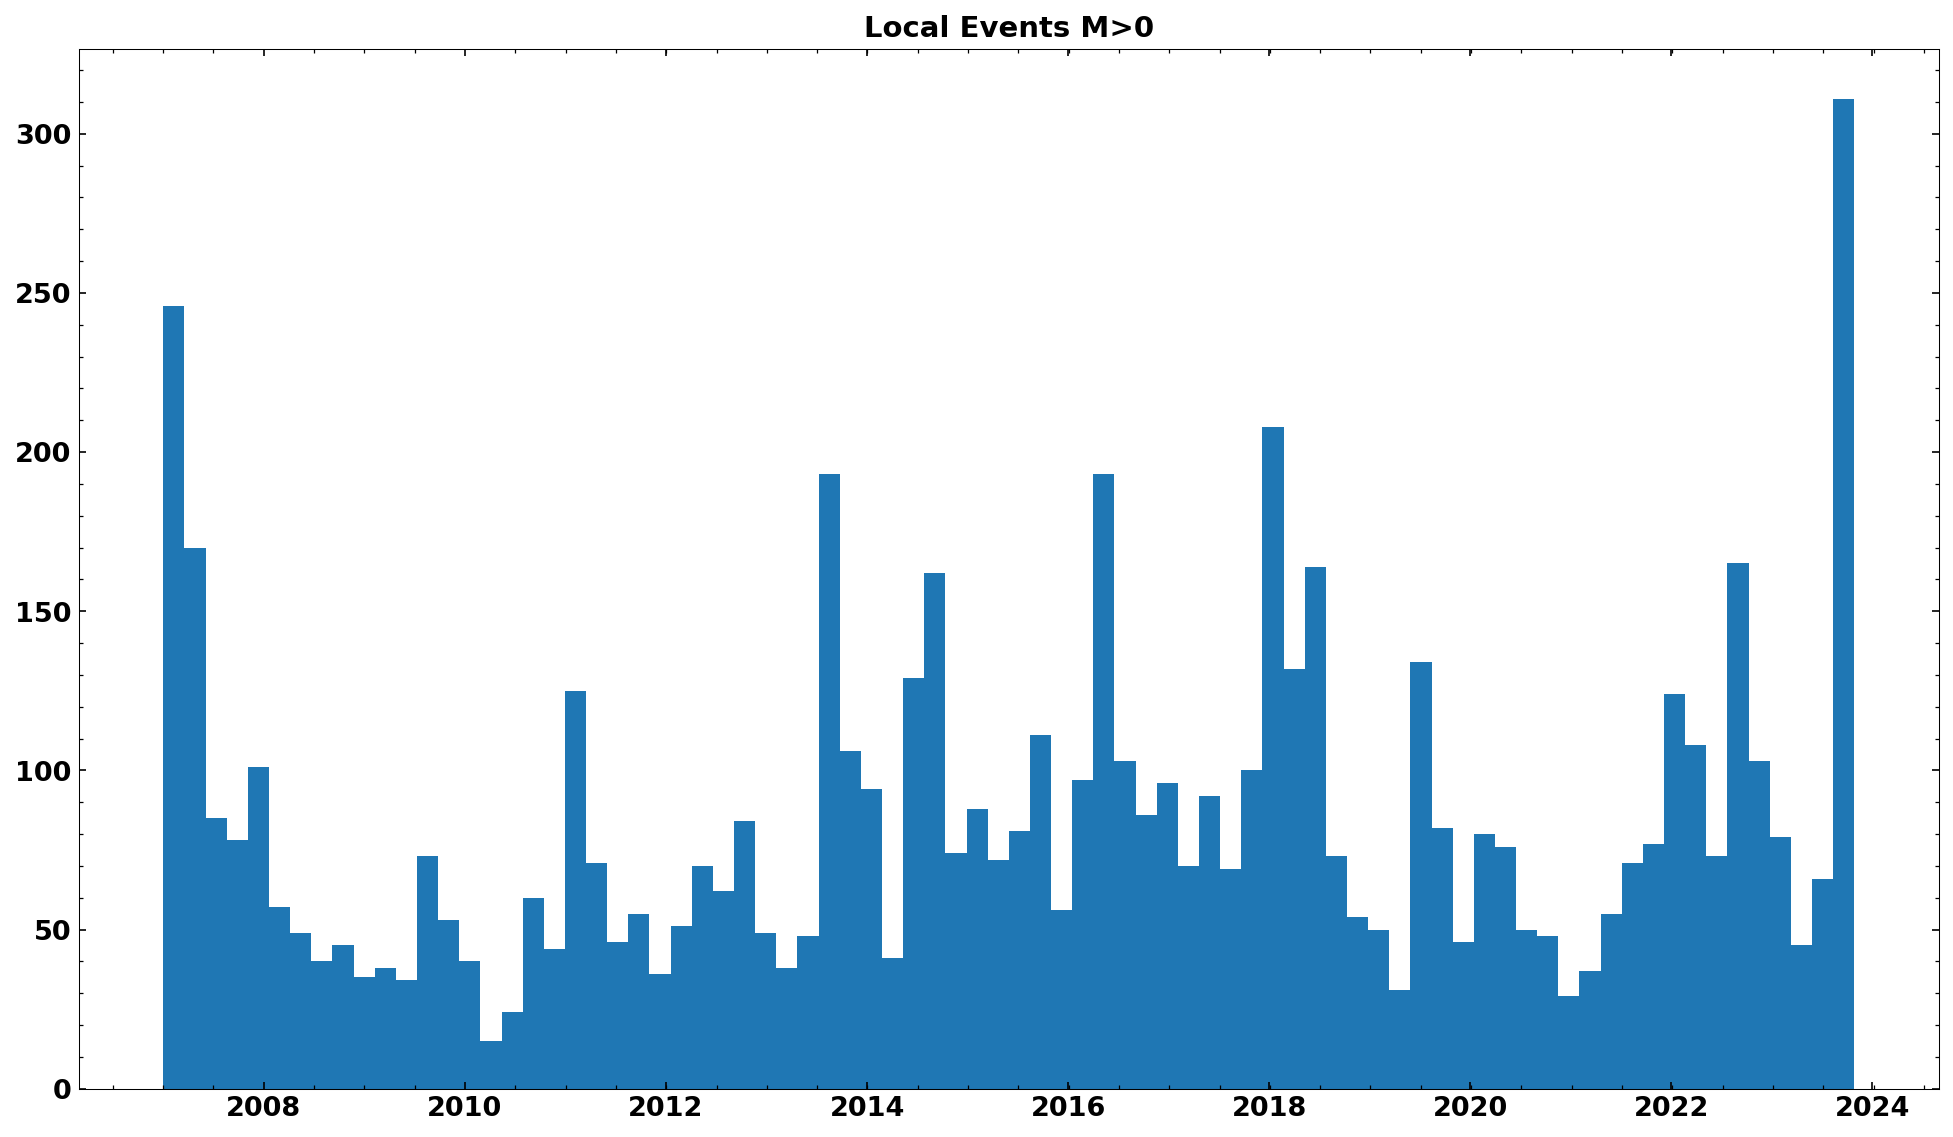

In [ ]:
import os
from matplotlib import pyplot as plt

plt.figure(figsize=(16,9))
plt.hist(otimes, 80)
os.makedirs('../figures/events/', exist_ok=True)
plt.title(f'Local Events M>{minmag}')
plt.savefig('../figures/events/event_distr.pdf',facecolor='none')

### plot events vs dv/v curve

In [ ]:
# load dv/v data for all frequencies
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = 0.5
corr_len = 3
std_model = 0.002
dv = {}
for freq0, std_model in zip([0.25, 0.5, 1.0], [0.006, 0.002, 0.004]):
    infile = glob.glob(
        f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-{freq0*2}/dvdt_3D.npz')[0]

    loaded = np.load(infile)

    x = loaded['xaxis']
    y = loaded['yaxis']
    t = loaded['taxis']
    dvdt = loaded['dv']

    start = np.argmin(abs(t - UTCDateTime('2007-06-01').timestamp))
    t = t[start:]
    dv[freq0] = -100*np.nancumsum(dvdt[15, 19, start:], axis=-1)
datetimes = [UTCDateTime(tt).datetime for tt in t]


In [ ]:
from obspy.signal.filter import highpass
from scipy.signal import detrend
# Filter dv signals
dv_hpf = {}
for freq0 in [0.25, 0.5, 1.0]:
    dv_1d = detrend(dv[freq0])
    df = 1/(datetimes[1]-datetimes[0]).total_seconds()
    filtfreq = 1/(2*365.25*24*60*60)
    dv_hpf[freq0] = highpass(dv_1d, filtfreq, df, corners=4, zerophase=True)

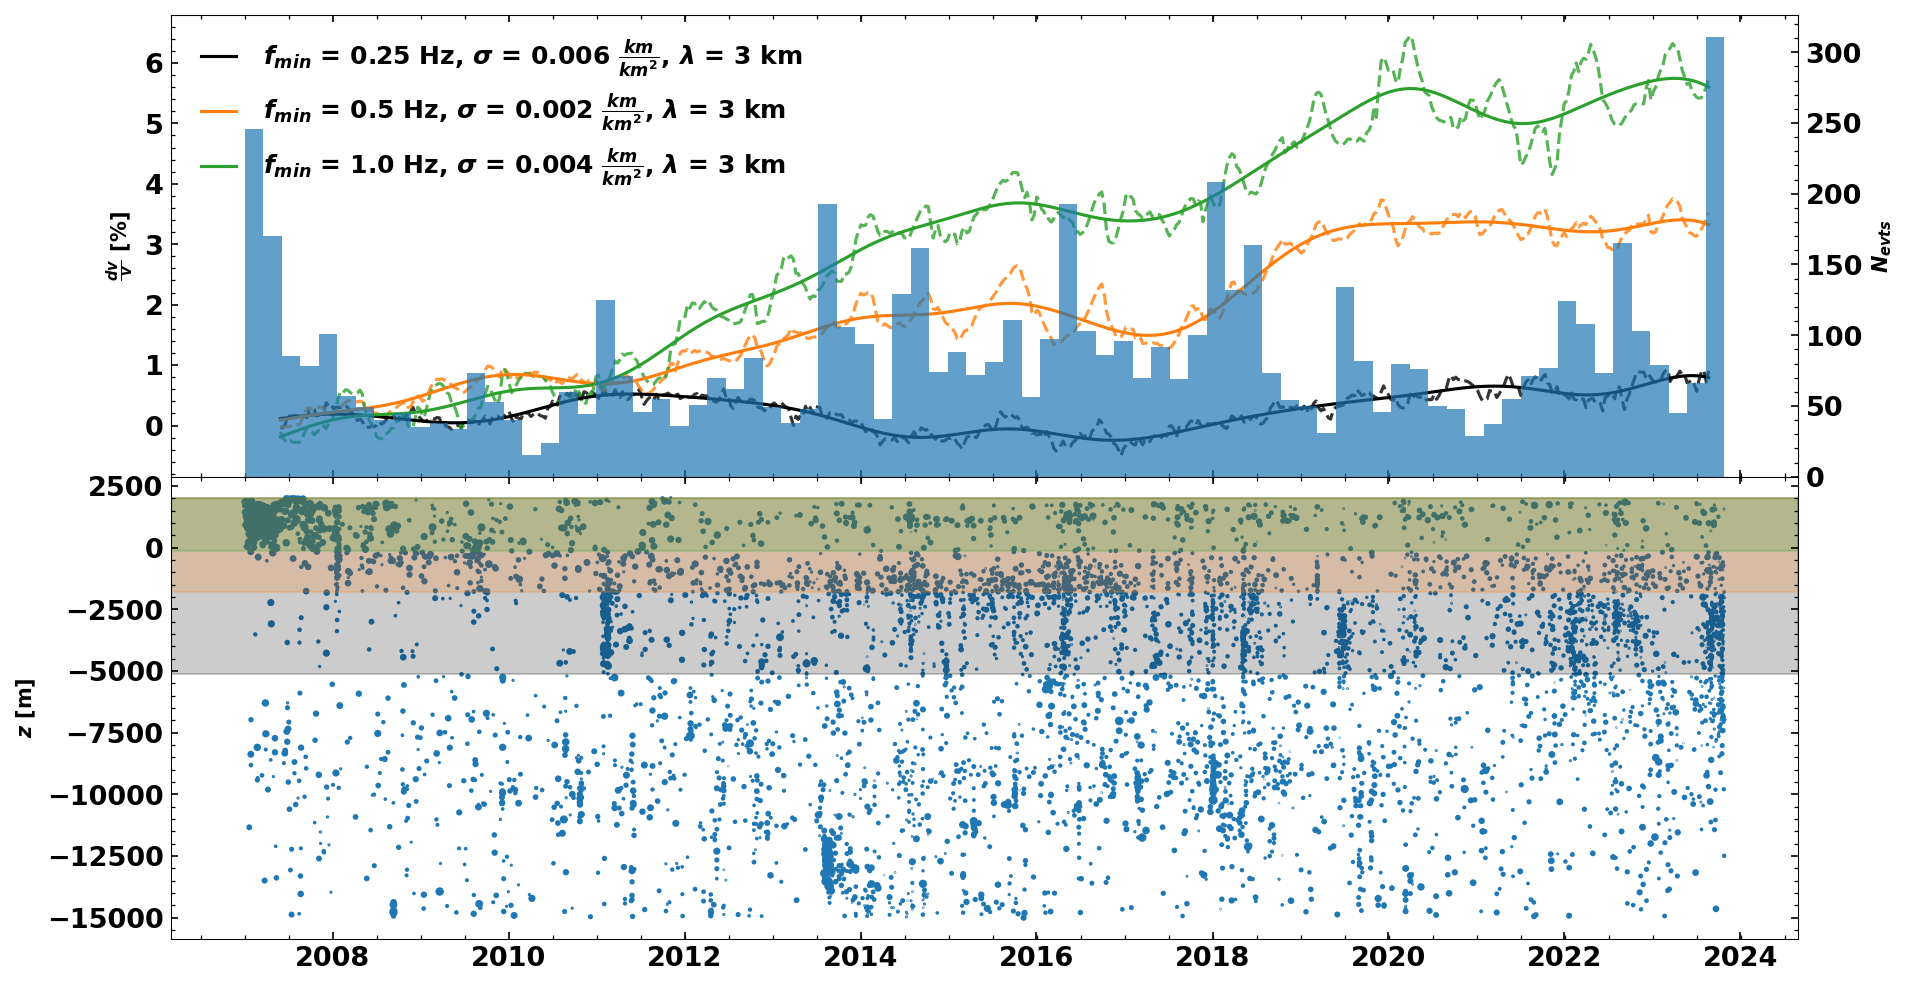

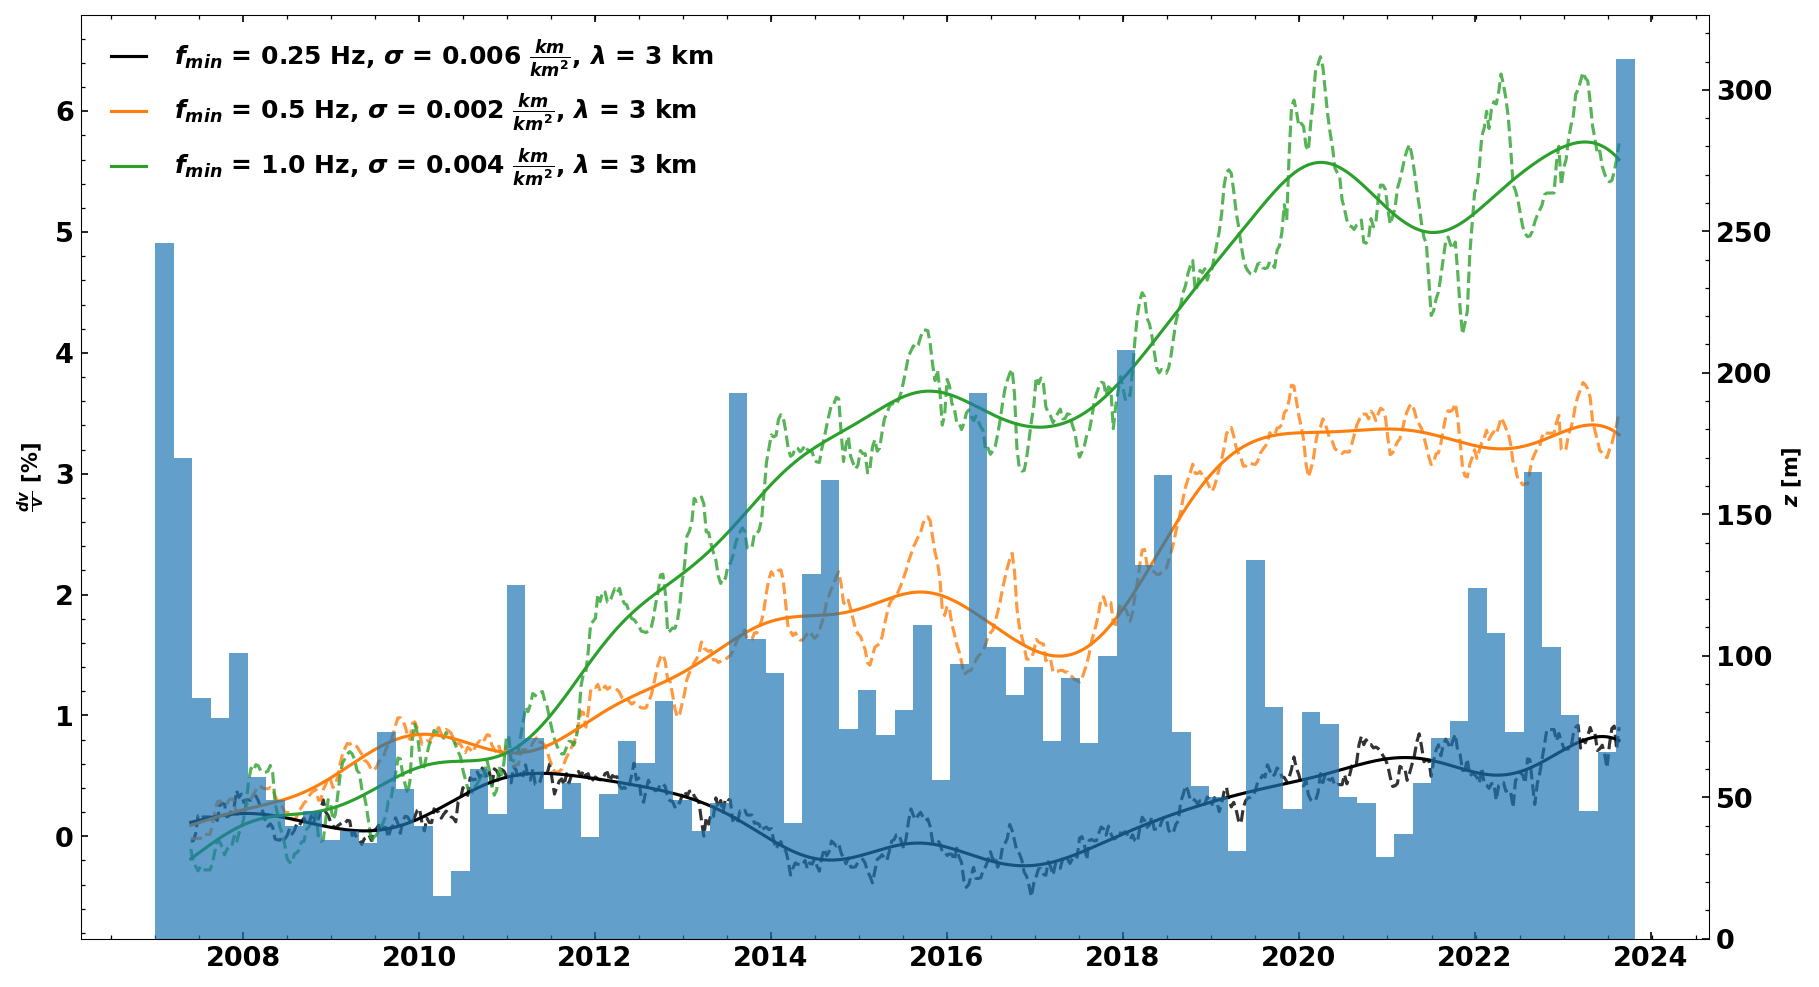

In [ ]:
from seismic.plot.plot_utils import set_mpl_params
set_mpl_params()

outfolder = os.path.join(os.path.dirname(os.path.dirname(infile)), 'figures')

# plot dv/v for all frequencies

# # difference
plt.figure(figsize=(14, 8))
ax0 = plt.subplot(2,1,1)
colors = ['k', 'C1', 'C2']
for freq0, std_model, col in zip(
        [0.25, 0.5, 1.0], [0.006, 0.002, 0.004], colors):
    plt.plot(
        datetimes, dv[freq0]-dv_hpf[freq0], label=r'$f_{min}$ = '+f'{freq0} Hz, '+r'$\sigma$ = '+f'{std_model} '+r'$\frac{km}{km^2}$, $\lambda$ = 3 km', color=col,zorder=5)
    # plt.plot(
    #     datetimes[1:], np.diff(dv[freq0]-dv_hpf[freq0]), color=col,zorder=5)
    plt.plot(
        datetimes, dv[freq0], linestyle='--', alpha=0.8, color=col,zorder=2)
plt.ylabel(r'$\frac{dv}{v}$ [%]')
plt.legend()

plt.twinx()
plt.hist(otimes, 80, alpha=0.7, zorder=1);
plt.ylabel(r'$N_{evts}$')

ax1 = plt.subplot(2,1,2, sharex=ax0)
plt.ylabel(r'$z$ [m]')

# plot earthquake depths
hypz = [-evt.preferred_origin().depth for evt in evts]
plt.scatter(otimes, hypz, s=[evt.preferred_magnitude().mag*3 for evt in evts])


# mark sensitivity ranges as shaded areas
# maximum sensitivity is 2/3 waveflength below surface
vel = 2500
for freq0, std_model, col in zip(
        [0.25, 0.5, 1.0], [0.006, 0.002, 0.004], colors):
    plt.axhspan(
        max(hypz)-2/3*vel/freq0-500, max(hypz), alpha=0.2, color=col, label=f'{freq0} Hz')
# remove the gap between the subplots
plt.subplots_adjust(hspace=0)
# remove upper x-label
plt.setp(ax0.get_xticklabels(), visible=False)

plt.savefig(f'{outfolder}/n_evts_dv_{freq0}.png', dpi=300, transparent=True, bbox_inches='tight')
plt.savefig(f'/home/pm/Documents_sync/PhD/seminars/SPIN seminar/n_evts_dv_{freq0}_depth.png', transparent=True, bbox_inches='tight')

# as above but only the upper subplot in a single figure
plt.figure(figsize=(14, 8))
colors = ['k', 'C1', 'C2']
for freq0, std_model, col in zip(
        [0.25, 0.5, 1.0], [0.006, 0.002, 0.004], colors):
    plt.plot(
        datetimes, dv[freq0]-dv_hpf[freq0], label=r'$f_{min}$ = '+f'{freq0} Hz, '+r'$\sigma$ = '+f'{std_model} '+r'$\frac{km}{km^2}$, $\lambda$ = 3 km', color=col,zorder=5)
    # plt.plot(
    #     datetimes[1:], np.diff(dv[freq0]-dv_hpf[freq0]), color=col,zorder=5)
    plt.plot(
        datetimes, dv[freq0], linestyle='--', alpha=0.8, color=col,zorder=2)
plt.ylabel(r'$\frac{dv}{v}$ [%]')
plt.legend()

plt.twinx()
plt.hist(otimes, 80, alpha=0.7, zorder=1);
plt.ylabel(r'$N_{evts}$')

plt.ylabel(r'$z$ [m]')
plt.savefig(f'/home/pm/Documents_sync/PhD/seminars/SPIN seminar/n_evts_dv_{freq0}.png', transparent=True, bbox_inches='tight')

